# Модель кластеризации KMeans

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Данные

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, 
                  random_state=10)

In [7]:
X.shape, y.shape

((100, 2), (100,))

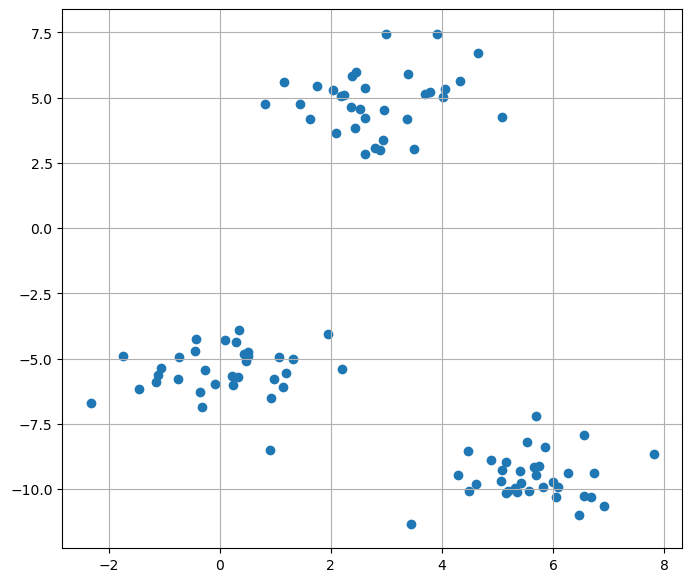

In [8]:
plt.figure(figsize=(8, 7))
plt.grid()
plt.scatter(x=X[:, 0], y=X[:, 1]);

# Алгоритм KMeans

## Инициализация центроид

Определить количество кластеров

In [43]:
k = 3 

Случайным образом выбрать $k$ точек в качестве изначальных центров кластеров

In [44]:
# Индексы случайных k центроид
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [45]:
# Центроиды по соответствующим индексам
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

In [60]:
# Цвета кластеров
colors=['orange', 'green', 'red']

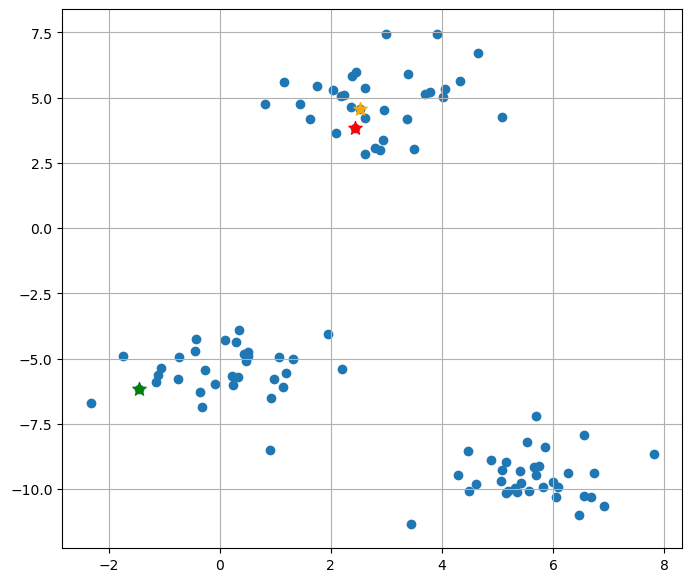

In [58]:
plt.figure(figsize=(8, 7))
plt.grid()

plt.scatter(X[:, 0], X[:, 1])
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='*', c=colors[i], s=100);

## Первая итерация обучения

Для каждой точки из выборки определить к какой центроиде она ближе.\
Рассчитать евклидово расстояние между центроидами и точками
$$
\sqrt{\sum{(x_1 - x_2)^2}}
$$

In [97]:
# Словарь для хранения кластеров
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [98]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1) # Расстояния между точкой и k центроидами
    cluster_ind = np.argmin(distances) # Индекс наименьшего расстояния (к какой цетроиде точка ближе)
    clusters[cluster_ind].append(x) # Запись точки в словарь под соответствующим кластером

In [99]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(25, 67, 8)

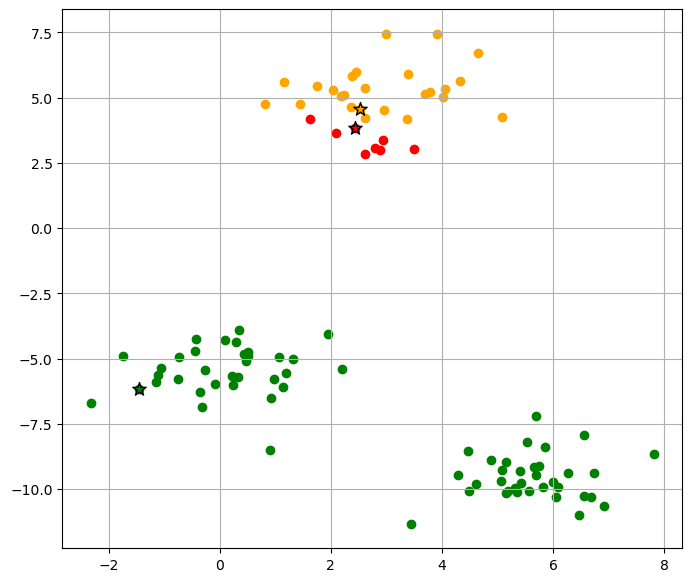

In [142]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Центроиды
for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], c=colors[i], marker='*', s=100, edgecolors='black');

### Пересчет центроидов

Переместить центроид в центр своего кластера.\
Определить среднее арифметическое всех точек кластера, по столбечно

In [157]:
new_centroids={}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

In [158]:
new_centroids

{0: array([2.91329082, 5.33493484]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.61305824, 3.369246  ])}

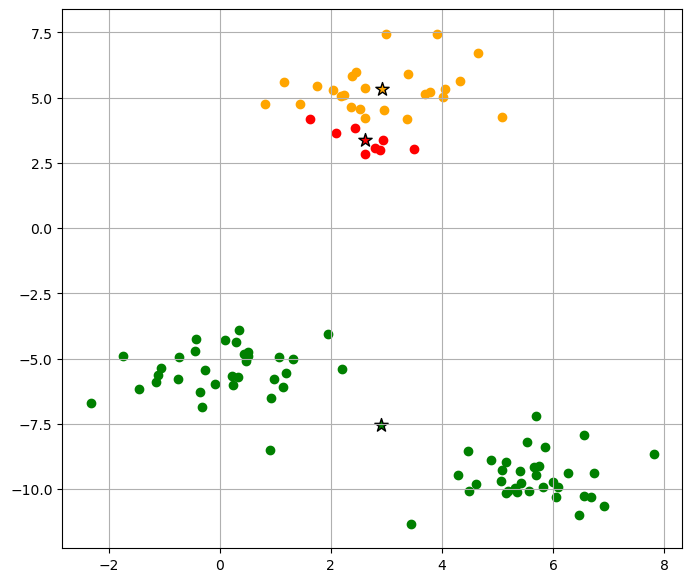

In [162]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Новые центроиды
for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], c=colors[i], marker="*", edgecolors='black', s=100)

## Вторая итерация обучения

Повторение предыдущих шагов до сходимости (до тех пор, пока величина смещения центроидов после каждого шага станет незначительной)

In [174]:
# Переназначаем центроиды на новые
centroids = np.array(list(new_centroids.values()))
centroids

array([[ 2.91329082,  5.33493484],
       [ 2.89504171, -7.53408753],
       [ 2.61305824,  3.369246  ]])

In [175]:
# Очищаем словарь кластеров
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [176]:
# Пересчитываем кластера
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1) # Расстояния между точкой и k центроидами
    cluster_ind = np.argmin(distances) # Индекс наименьшего расстояния (к какой цетроиде точка ближе)
    clusters[cluster_ind].append(x) # Запись точки в словарь под соответствующим кластером

In [177]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(23, 67, 10)

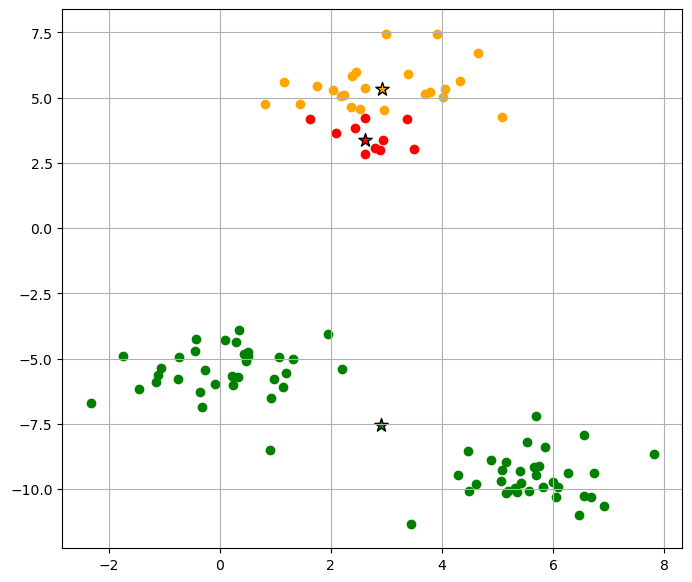

In [178]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Центроиды
for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], c=colors[i], marker='*', s=100, edgecolors='black');

In [181]:
# Пересчет центроидов
new_centroids={}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

In [182]:
new_centroids

{0: array([2.90614881, 5.43314686]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.68953138, 3.53649614])}

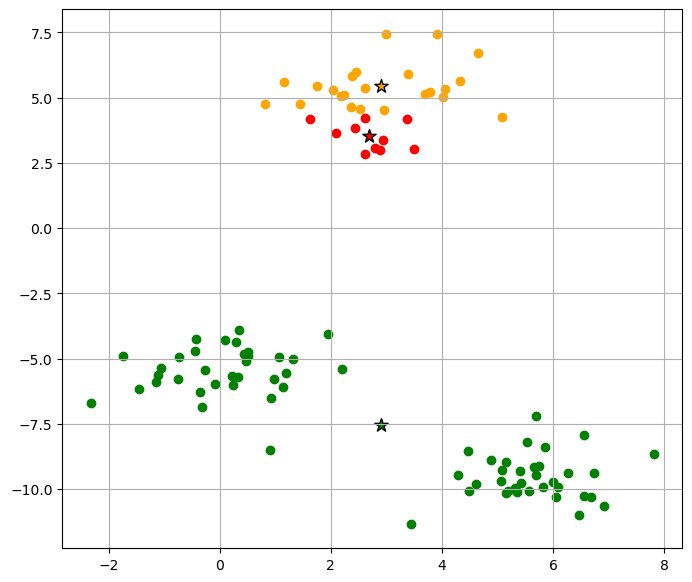

In [183]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Новые центроиды
for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], c=colors[i], marker="*", edgecolors='black', s=100)

# Функция KMeans

In [249]:
def K_Means(X, k=3, min_distance=1e-4, seed=0):
    # Инициализация центроидов
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    # Итерационный цикл
    Flag = True
    while Flag:
        clusters = {i: [] for i in range(k)}

        # Считаем расстояния
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1) # Расстояния между точкой и k центроидами
            cluster_ind = np.argmin(distances) # Индекс наименьшего расстояния (к какой цетроиде точка ближе)
            clusters[cluster_ind].append(x) # Запись точки в словарь под соответствующим кластером

        # Пересчет центроидов
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = np.array(list(new_centroids.values()))

        print(len(clusters[0]), len(clusters[1]), len(clusters[2]))
        print(new_centroids)

        # Критерий останова
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) <= min_distance:
                Flag = False
                
        centroids = new_centroids.copy()

    return centroids, clusters

In [253]:
centroids, clusters = K_Means(X, k, seed=1)
centroids

26 66 8
[[  5.29660654  -9.38045292]
 [  1.46485965  -0.3030066 ]
 [  6.66400306 -10.07078922]]
29 61 10
[[ 4.49298218 -8.90049529]
 [ 1.50550525  0.21865431]
 [ 6.55722276 -9.96800753]]
33 48 19
[[ 2.34915724 -7.50785928]
 [ 1.95733764  1.86223045]
 [ 6.11737555 -9.79390688]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]


array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

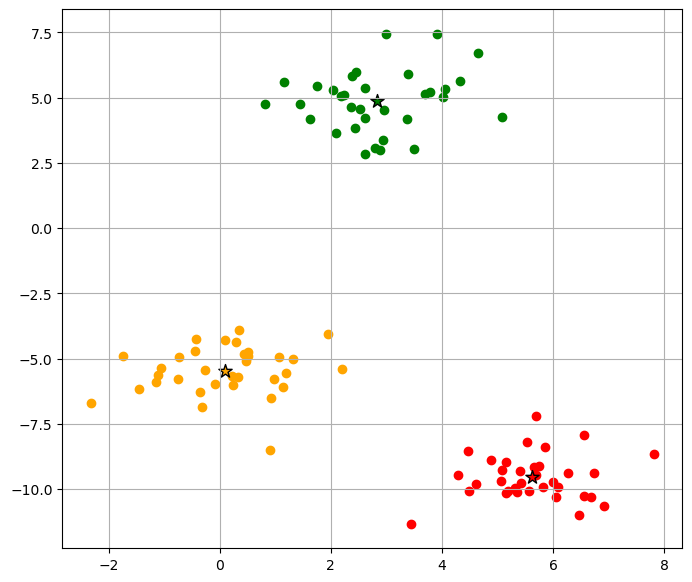

In [256]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Центроиды
for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], c=colors[i], marker='*', s=100, edgecolors='black');

# Sklearn KMeans

In [202]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
from sklearn.cluster import KMeans

In [204]:
model = KMeans(n_clusters=k, 
               init='k-means++', 
               max_iter=10,
               random_state=0)
model

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [205]:
model.fit(X)

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [206]:
labels = model.predict(X)

In [207]:
labels

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [226]:
model.cluster_centers_

array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

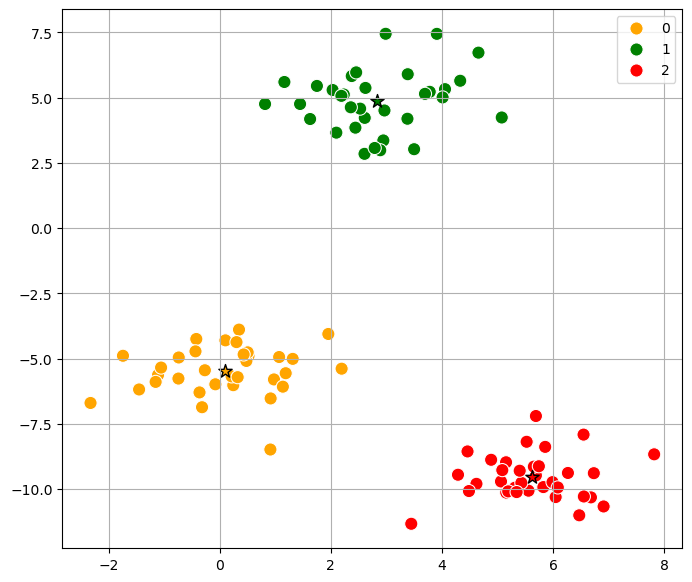

In [230]:
plt.figure(figsize=(8, 7))
plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=colors, s=90)
for i in range(len(model.cluster_centers_)):
    plt.scatter(model.cluster_centers_[i, 0], model.cluster_centers_[i, 1], marker='*', c=colors[i], s=100, edgecolors='black')


    
# for i in range(len(labels)):
#     plt.scatter(X[i, 0], X[i, 1], c=colors[labels[i]]);

# Sklearn KMeans++

In [49]:
from sklearn.cluster import kmeans_plusplus

In [19]:
centroids, centroid_ids = kmeans_plusplus(X, n_clusters=3)

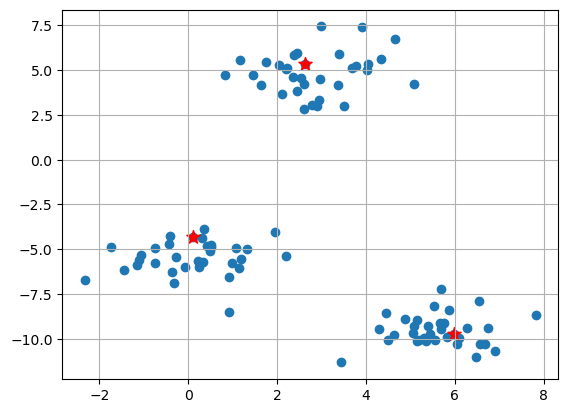

In [20]:
plt.grid()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1],marker='*',s=100, c='red');

In [21]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters=3, init='k-means++')
model

KMeans(n_clusters=3)

# Алгоритм KMeans++

1. Первая центроида инициализируется случайно
2. Для каждой точки рассчитывается расстояние до всех центроидов
3. Записываются наименьшие расстояние
4. Точка с наибольшим из наименьших расстояний становится новым центроидом

In [46]:
def KMeansPlusPlus(X, k, seed=0):
    centroids = []
    np.random.seed(seed)

    # Инициализация первой точки
    centroid_id = np.random.choice(X.shape[0]) 
    centroids.append(X[centroid_id])
    
    # Инициализация остальных точек
    for _ in range(k-1):
        dists = []

        # Для каждой точки рассчитыаются расстояния до каждого центроида
        for x in X:
            # Считаем расстояние от точки до центроидов
            distances = np.linalg.norm(centroids - x, axis=1)
            # Выбирается расстояние до ближайшего центроида
            dists.append(distances.min())
            
        obj_ind = np.array(dists).argmax() # Выбирается индекс наиболее удаленной точки
        next_centroids = X[obj_ind] # Точка под этим индексом выбирается как новый центроид
        centroids.append(next_centroids)

    return centroids

In [47]:
centroids = KMeansPlusPlus(X, 3,seed=1)
centroids

[array([2.45717481, 5.96515011]),
 array([  6.47259572, -11.00351704]),
 array([-1.74093095, -4.89176978])]

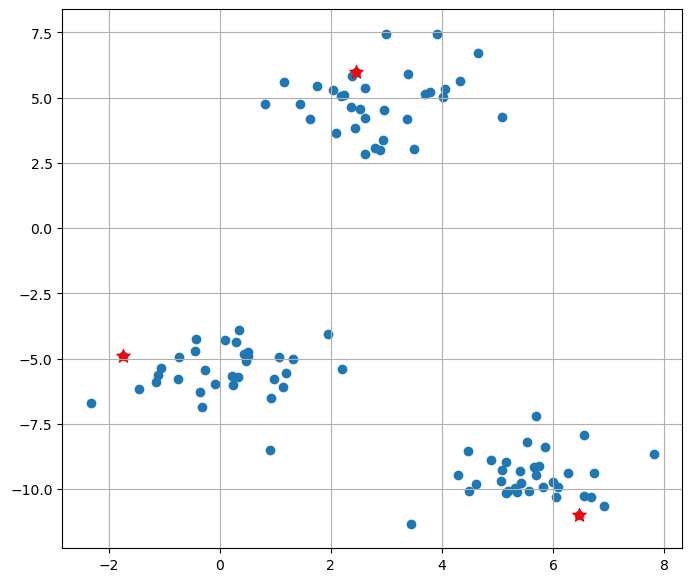

In [48]:
plt.figure(figsize=(8, 7))
plt.grid()

plt.scatter(X[:, 0], X[:, 1])

for center in centroids:
    plt.scatter(center[0], center[1], c='red', marker='*', s=100);

# Elbow-Method

Метод определения оптимального значения $k$ для модели **KMeans**
1. По очереди строит модели на последовательности разных $k$
2. В полученных моделях считает внутрекластерную дисперсию(**Инерцию**)
3. Когда дисперсия с увеличением количества кластеров перестает существенно меняться(стремиться к нулю)
4. То этот "*перегиб локтя*" на графике и будет оптимальным значением $k$ для данных

**Инерция** - Внутрекластерная дисперсия. 
Сумма сумм квадратов разниц между точками кластера и его центроидом
$$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_classification

## yellowbrick

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
from yellowbrick.cluster import KElbowVisualizer

In [121]:
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=200, random_state=10)

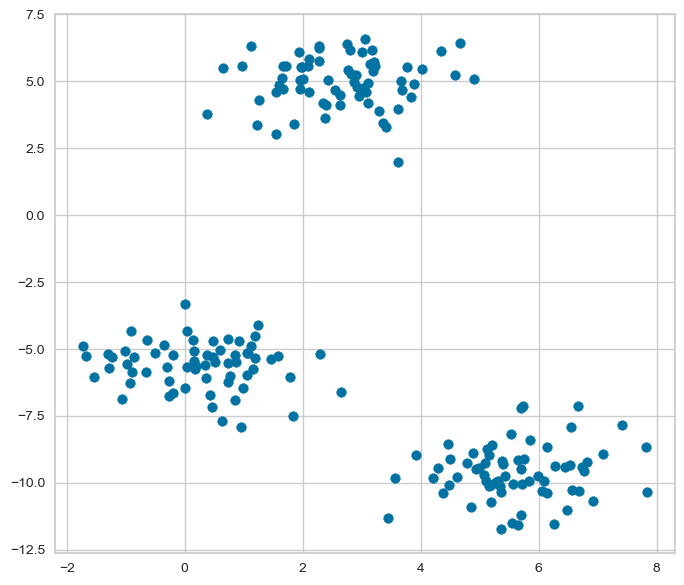

In [122]:
plt.figure(figsize=(8, 7))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1]);

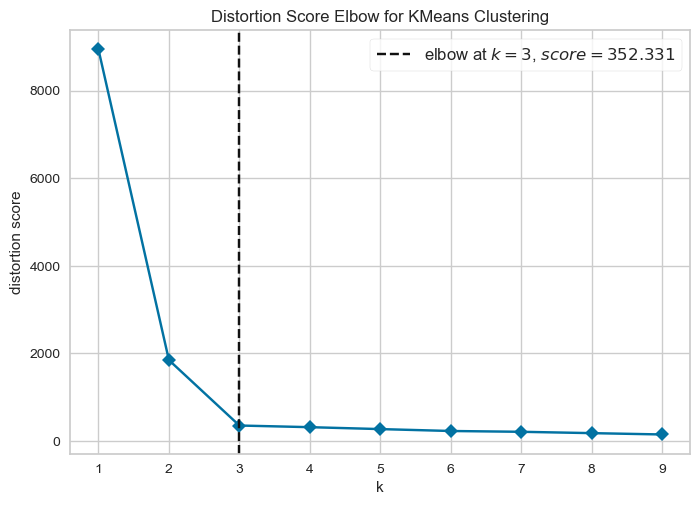

In [123]:
VisualBlob = KElbowVisualizer(KMeans(random_state=1), k=(1, 10), timings=False)
VisualBlob.fit(X_blobs)
VisualBlob.show();

In [124]:
k = VisualBlob.elbow_value_

In [125]:
model=KMeans(n_clusters=k,
             random_state=1)
model

KMeans(n_clusters=3, random_state=1)

In [126]:
model.fit(X_blobs)

KMeans(n_clusters=3, random_state=1)

In [127]:
labels = model.predict(X_blobs)

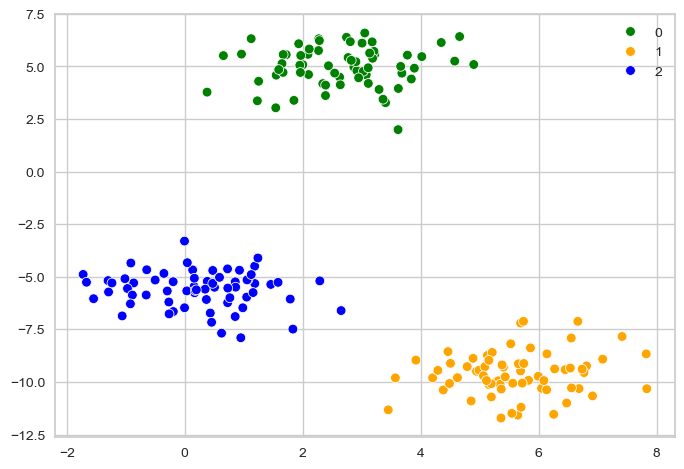

In [128]:
sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=labels, palette=['green', 'orange', 'blue']);

----

In [146]:
# Центроиды
model.cluster_centers_

array([[ 2.63891286,  4.98896723],
       [ 5.60633314, -9.62156756],
       [ 0.24256428, -5.60038135]])

**Подсчёт инерции**

In [144]:
cluster_0 = X_blobs[labels == 0]
cluster_0_center = model.cluster_centers_[0]

cluster_1 = X_blobs[labels == 1]
cluster_1_center = model.cluster_centers_[1]

cluster_2 = X_blobs[labels == 2]
cluster_2_center = model.cluster_centers_[2]

In [145]:
np.linalg.norm(cluster_0 - cluster_0_center)**2 + np.linalg.norm(cluster_1 - cluster_1_center)**2 + np.linalg.norm(cluster_2 - cluster_2_center)**2

352.3306691316606

In [131]:
# Инерция
model.inertia_

352.3306691316606